In [4]:
from pylabcontrol.core import Script
import numpy as np
import glob
import matplotlib.pyplot as plt

In [9]:
afm_scans=glob.glob(r'C:\Users\Characterization\B26_scanning_probe\data\*afmscan*')
afm_scans

['C:\\Users\\Characterization\\B26_scanning_probe\\data\\221208-14_52_16_afmscan',
 'C:\\Users\\Characterization\\B26_scanning_probe\\data\\221208-14_53_08_afmscan',
 'C:\\Users\\Characterization\\B26_scanning_probe\\data\\221208-14_53_22_afmscan',
 'C:\\Users\\Characterization\\B26_scanning_probe\\data\\221208-16_20_12_afmscan',
 'C:\\Users\\Characterization\\B26_scanning_probe\\data\\221208-16_22_12_afmscan',
 'C:\\Users\\Characterization\\B26_scanning_probe\\data\\221208-16_31_07_afmscan',
 'C:\\Users\\Characterization\\B26_scanning_probe\\data\\221208-16_31_35_afmscan',
 'C:\\Users\\Characterization\\B26_scanning_probe\\data\\221208-16_32_07_afmscan',
 'C:\\Users\\Characterization\\B26_scanning_probe\\data\\221208-16_32_42_afmscan',
 'C:\\Users\\Characterization\\B26_scanning_probe\\data\\221208-16_33_55_afmscan',
 'C:\\Users\\Characterization\\B26_scanning_probe\\data\\221208-16_37_50_afmscan',
 'C:\\Users\\Characterization\\B26_scanning_probe\\data\\221208-16_39_16_afmscan',
 'C:

C:\Users\Characterization\B26_scanning_probe\data\230113-14_55_37_afmscan


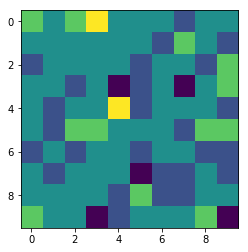

a: 0.000000 , 0.000000
b: 30.000000 , 30.000000
C:\Users\Characterization\B26_scanning_probe\data\230113-14_58_13_afmscan


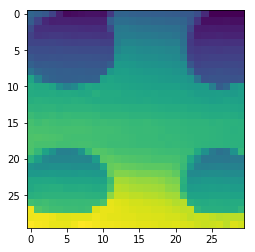

a: 0.000000 , 0.000000
b: 30.000000 , 30.000000
C:\Users\Characterization\B26_scanning_probe\data\230113-14_59_33_afmscan


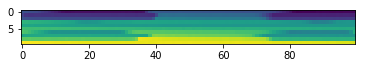

a: 0.000000 , 0.000000
b: 30.000000 , 30.000000
C:\Users\Characterization\B26_scanning_probe\data\230113-15_03_00_afmscan


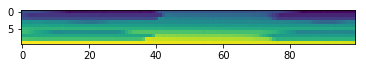

a: 0.000000 , 0.000000
b: 30.000000 , 30.000000
C:\Users\Characterization\B26_scanning_probe\data\230113-15_03_32_afmscan


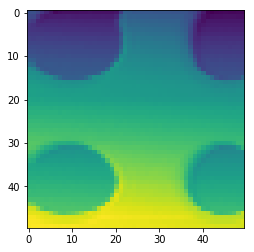

a: 0.000000 , 0.000000
b: 30.000000 , 30.000000
C:\Users\Characterization\B26_scanning_probe\data\230113-15_04_32_afmscan


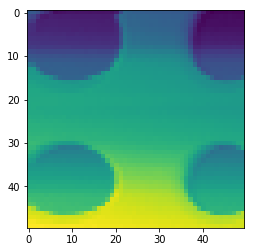

a: 0.000000 , 0.000000
b: 30.000000 , 30.000000
C:\Users\Characterization\B26_scanning_probe\data\230113-15_05_26_afmscan


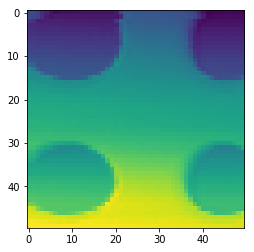

a: 0.000000 , 0.000000
b: 30.000000 , 30.000000
C:\Users\Characterization\B26_scanning_probe\data\230113-15_06_21_afmscan


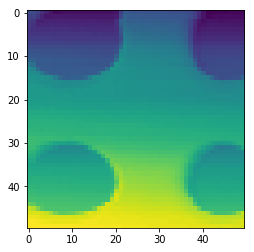

a: 0.000000 , 0.000000
b: 30.000000 , 30.000000
C:\Users\Characterization\B26_scanning_probe\data\230113-15_07_49_afmscan


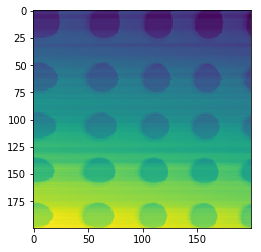

a: 0.000000 , 0.000000
b: 75.000000 , 75.000000
C:\Users\Characterization\B26_scanning_probe\data\230113-15_30_34_afmscan


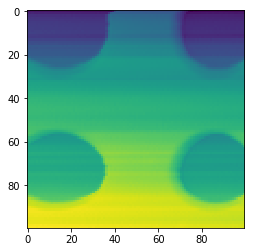

a: 0.000000 , 0.000000
b: 30.000000 , 30.000000
C:\Users\Characterization\B26_scanning_probe\data\230113-15_52_12_afmscan


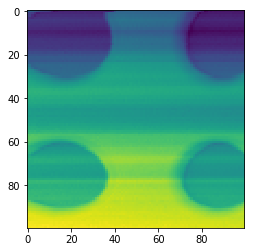

a: 0.000000 , 0.000000
b: 30.000000 , 30.000000
C:\Users\Characterization\B26_scanning_probe\data\230113-16_30_36_afmscan


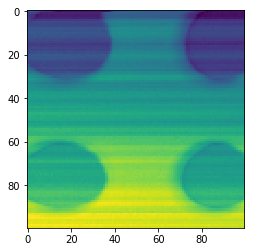

a: 0.000000 , 0.000000
b: 30.000000 , 30.000000


In [11]:
# conversion factor of nanomax
dim_cf = 0.266667 # um/V
con_z = 0.256
for d in afm_scans[::]:
    if "230113" in d:
        print(r'{}'.format(d))
        try:
            data = Script.load_data(r'{}'.format(d))
            image = data['image_data']
            plt.imshow(image)
            plt.show()

            # write image data to text file
            #with open(r'{}\scandimensions.txt'.format(d), 'w') as f:
            np.savetxt(fname= r'{}\rawdata.txt'.format(d),X=image)
        
            extent = data['extent']
            point_a= [extent[0],extent[3]]
            point_b= [extent[1],extent[2]]
            print('a: %f , %f'%(point_a[0],point_a[1]))
            print('b: %f , %f'%(point_b[0],point_b[1]))

            # dimensions of scan in volts
            dimV_x = abs(point_a[0]-point_b[0])
            dimV_y = abs(point_a[1]-point_b[1])

            # dimenstions of scan in um
            dim_x = dimV_x*dim_cf
            dim_y = dimV_y*dim_cf

            # pixels
            px_x, px_y = np.shape(image)

            # write dimensions to text file
            with open(r'{}\scandimensions.txt'.format(d), 'w') as f:
                f.write('pixels: \n%i\n%i\ndimensions in [um]:\n%.4f\n%.4f\nconversion z [um/v]:\n%.4f'%(px_x,px_y,dim_x,dim_y,con_z))

        except:
            print("could not load data")

In [8]:
0.256*100/118

0.2169491525423729